# Rolling Hydraulic

In [1]:
import numpy as np
import pandas as pd
from random import random
from random import randint
from random import gauss
import matplotlib.pyplot as plt
from scipy.stats import norm
from scipy import stats
import seaborn as sns
from scipy.stats import kurtosis
from scipy.stats import skew

Generating Reference Data 

Before Metal-in (50seq) + Rolling (150seq) + After Metal-out (50seq)

1. Before Metal-in & After Metal-out
  - Fixed at 20bar
  
2. Rolling
  - 100~350bar : random integer number between 100~350

### Normal Case

dev : 4


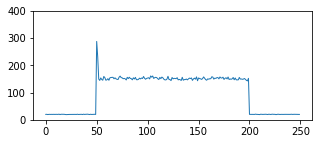

dev : 6


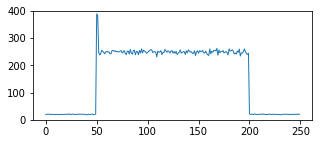

dev : 6


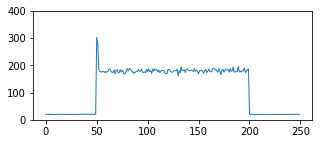

dev : 7


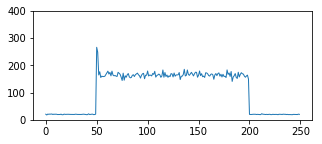

dev : 3


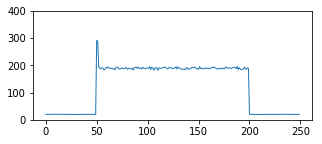

dev : 2


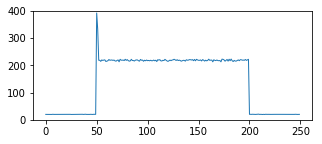

dev : 10


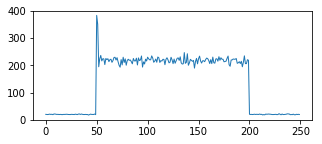

dev : 5


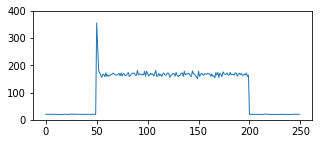

dev : 9


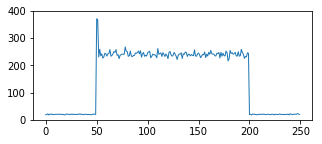

dev : -6


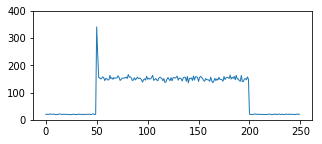

dev : 11


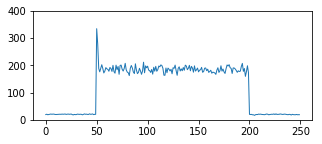

dev : 6


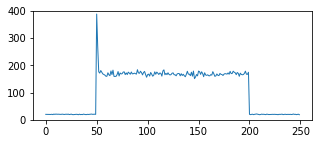

dev : 8


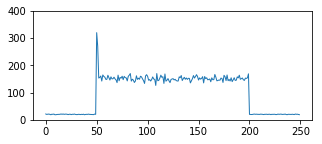

dev : 4


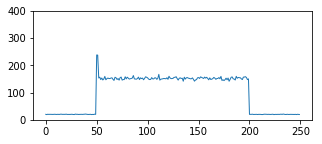

dev : 5


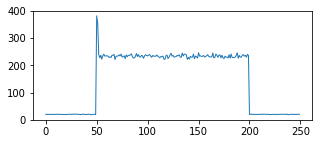

dev : 2


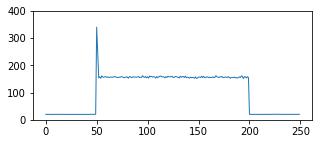

dev : 11


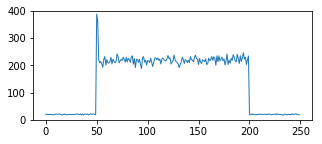

dev : 4


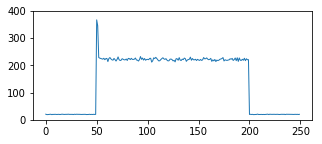

dev : -3


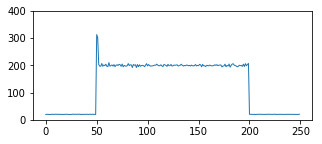

dev : 11


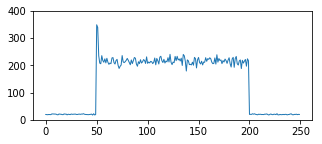

dev : 1


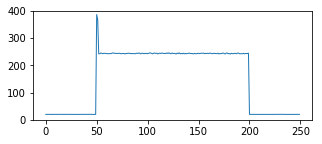

dev : 15


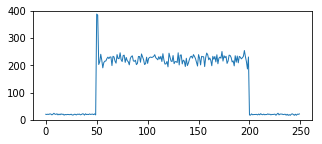

dev : 2


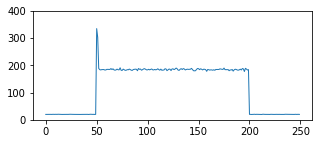

dev : 9


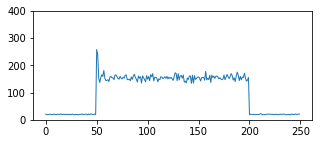

dev : 8


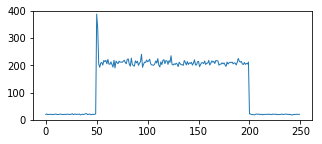

dev : 3


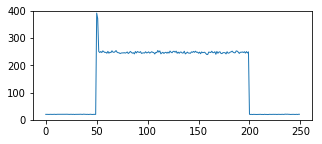

dev : 8


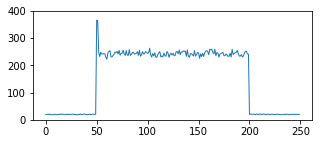

dev : 3


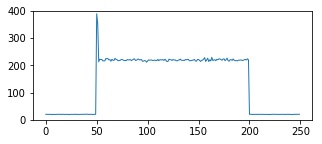

dev : 7


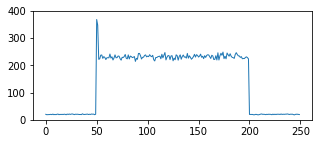

dev : 0


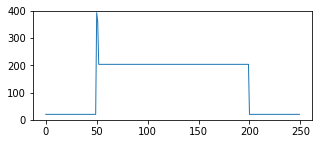

dev : 6


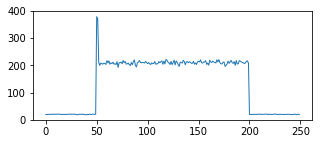

dev : -1


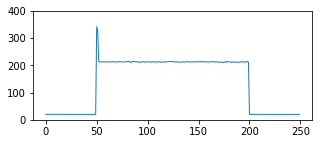

dev : 12


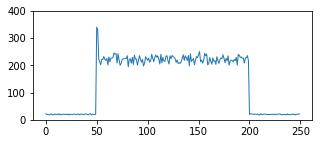

dev : 3


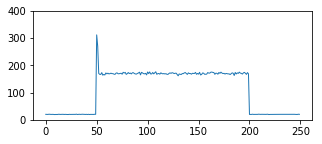

dev : -1


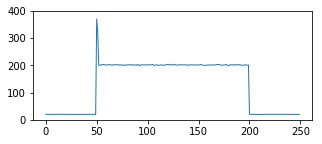

dev : 3


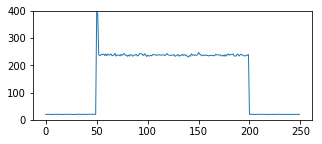

dev : 6


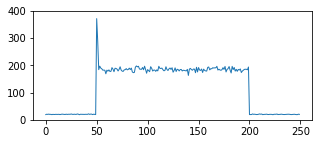

dev : -4


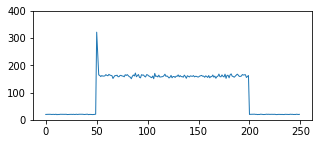

dev : 5


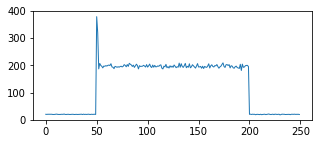

dev : 9


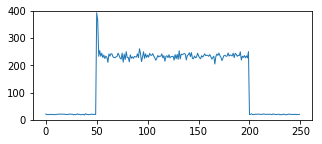

dev : 11


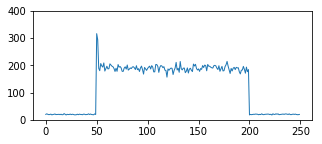

dev : 0


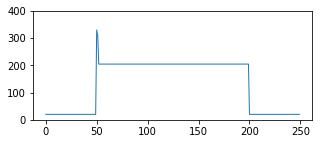

dev : 2


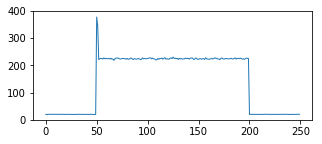

dev : 10


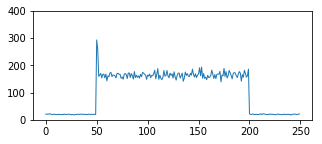

dev : 6


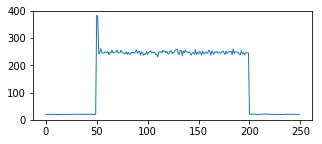

dev : 2


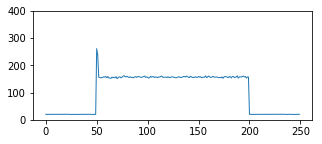

dev : 5


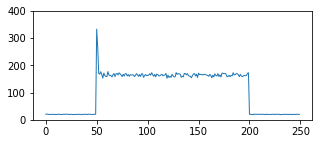

dev : 13


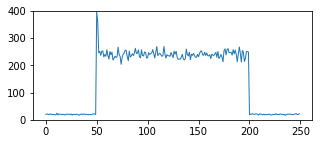

dev : 18


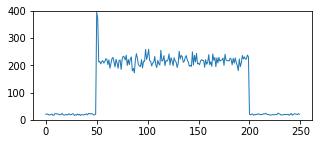

dev : 6


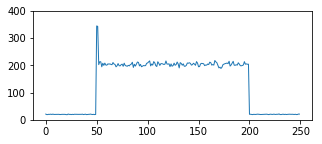

dev : 4


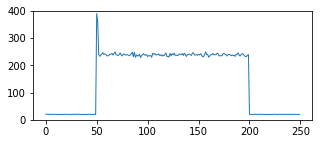

dev : 2


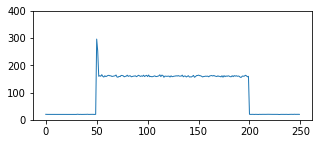

dev : -1


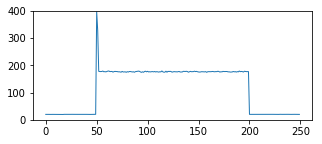

dev : 2


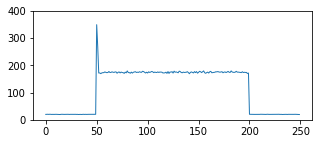

dev : 7


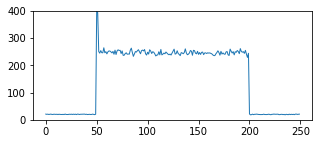

dev : -2


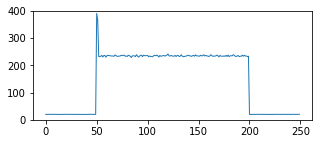

dev : 1


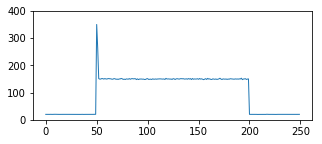

dev : 0


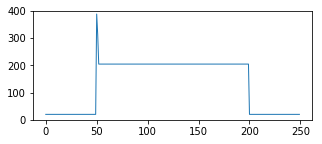

dev : 3


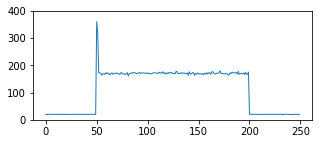

dev : 3


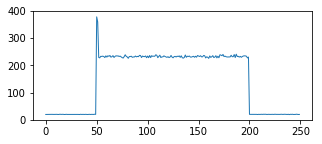

dev : 10


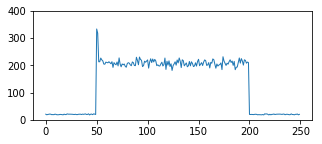

dev : 6


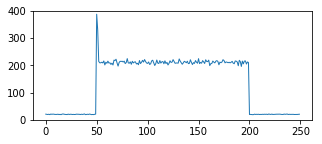

dev : 10


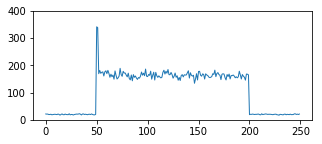

dev : 11


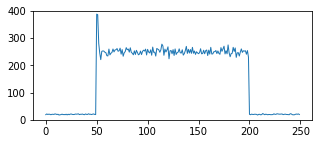

dev : 6


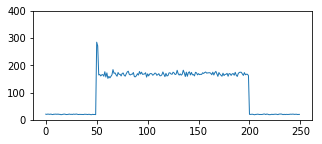

dev : -8


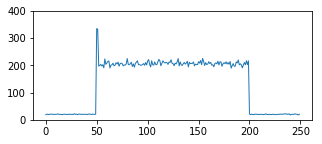

dev : 8


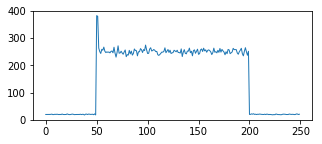

dev : 10


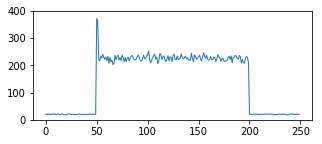

dev : 10


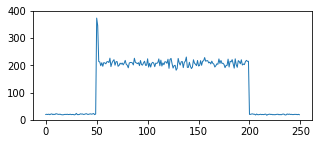

dev : 7


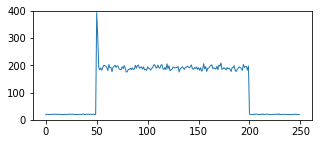

dev : 5


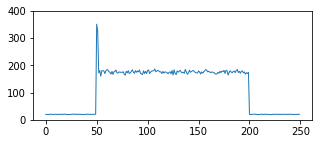

dev : 9


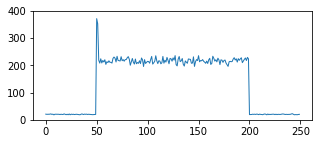

dev : 5


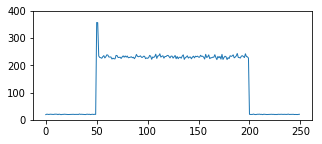

dev : 10


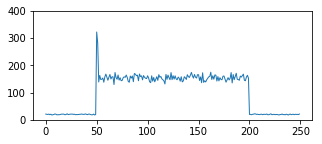

dev : 10


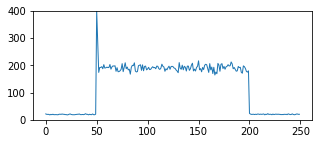

dev : 1


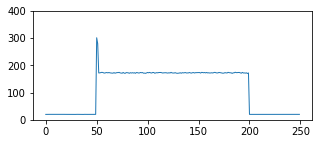

dev : 13


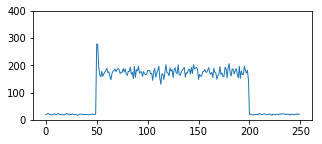

dev : 4


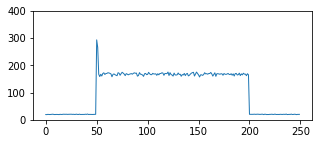

dev : 7


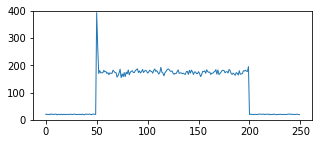

dev : -1


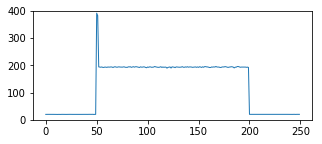

dev : 6


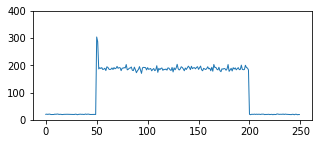

dev : 2


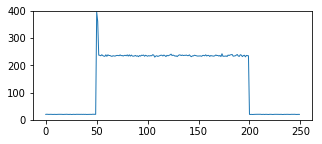

dev : 10


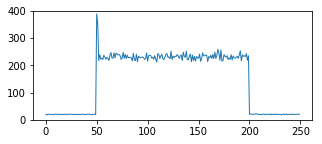

dev : 9


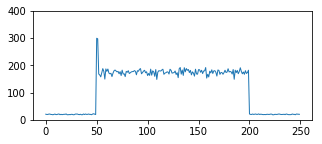

dev : 1


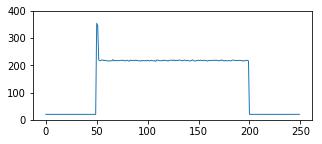

dev : 12


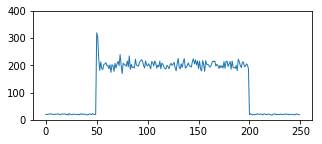

dev : 4


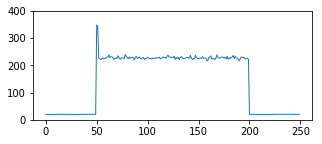

dev : -1


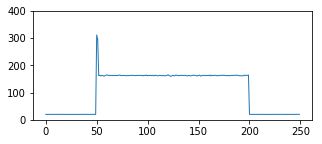

dev : 6


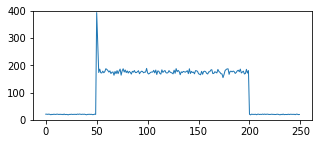

dev : 6


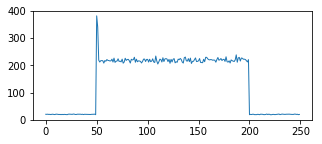

dev : 10


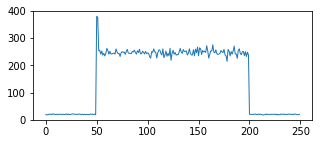

dev : 17


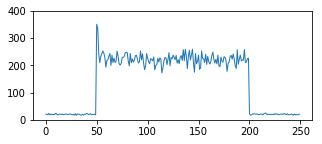

dev : 14


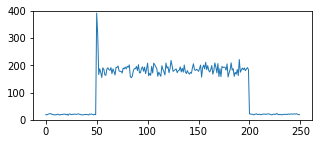

dev : -5


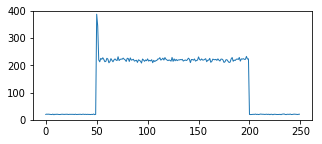

dev : -1


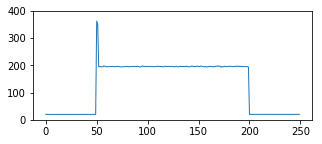

dev : 5


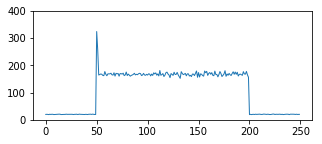

dev : 13


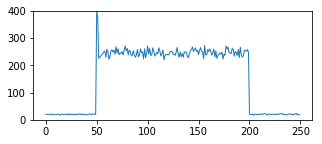

dev : 6


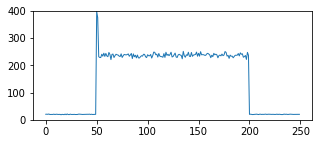

dev : 0


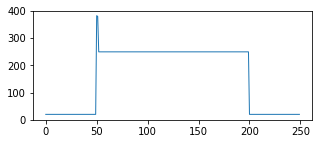

dev : 5


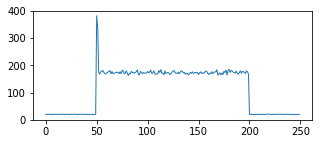

In [13]:
normal_dict_ref = dict()
normal_dict_fbk = dict()

for i in range(100):
    
    #Reference Data
    ref_before = [20] * 50
    ref_rolling = [randint(150,250)] * 150
    ref_after = [20] * 50
    ref_set = ref_before + ref_rolling + ref_after
    
    #Feedback Data
    dev = round(gauss(5,5))
    fbk_before = [gauss(np.unique(ref_before)[0], dev/10) for i in range(len(ref_before))]
    fbk_rolling = [gauss(np.unique(ref_rolling)[0], dev) for i in range(len(ref_rolling))]
    fbk_after = [gauss(np.unique(ref_after)[0], dev/10) for i in range(len(ref_after))]
    
    #Replacing Overshooting Data
    temp = []
    while len(temp) < len(fbk_rolling)/100:
        a = gauss(np.unique(ref_rolling)[0], 100)
        if (a >= np.unique(ref_rolling) * 1.5 and a <= 400):
            temp.append(a)
        else:
            pass
    temp.sort(reverse = True)
    fbk_rolling[0:round(len(fbk_rolling)/100)] = temp
    
    #Plotting
    fbk_set = fbk_before + fbk_rolling + fbk_after
    fig = plt.figure(figsize=(5,2))
    plt.plot(fbk_set, linewidth = 1)
    plt.ylim((0,400))
    #fig.savefig('./data/train/normal/normal' + str(i + 1) + '.jpg')
    fig.savefig('./data/test/' + str((i + 1)*2-1) + '.jpg')
    print('dev : ' + str(dev))
    plt.show()
    
    normal_dict_ref['normal_ref'+str(i)] = ref_set
    normal_dict_fbk['normal_fbk'+str(i)] = fbk_set
    
normal_dict_ref.update(normal_dict_fbk)
normal_dummy_data = pd.DataFrame(normal_dict_ref)
normal_dummy_data.to_csv('normal_dummy_data_100.csv', index = False)

### Abnormal Case

dev : 15


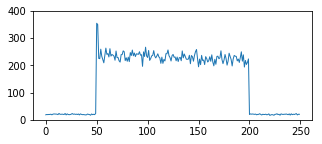

dev : 22


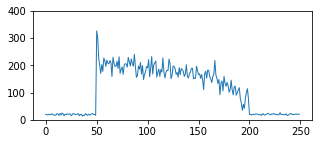

dev : 24


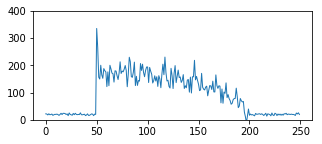

dev : 22


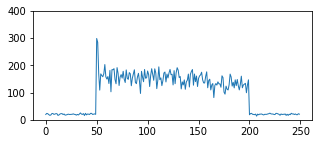

dev : 25


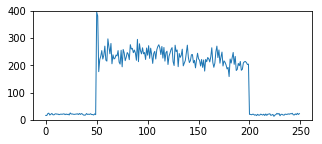

dev : 23


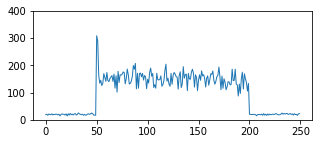

dev : 15


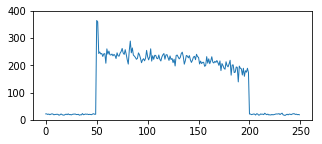

dev : 18


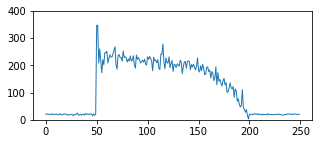

dev : 16


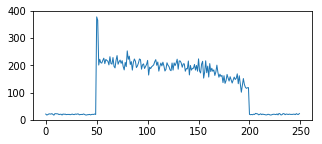

dev : 27


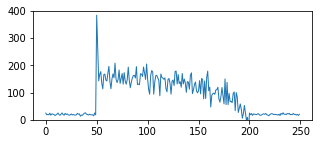

dev : 24


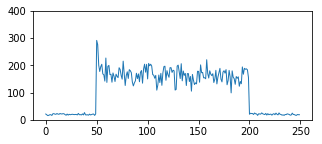

dev : 16


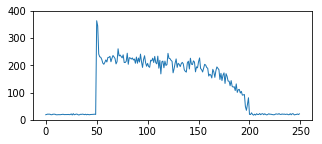

dev : 17


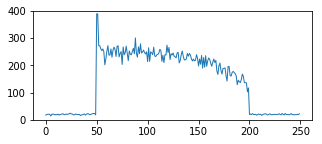

dev : 24


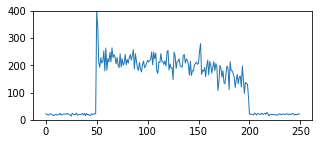

dev : 18


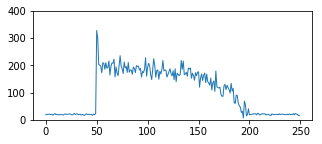

dev : 20


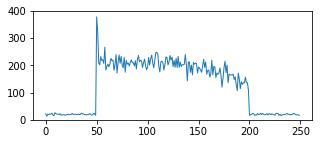

dev : 19


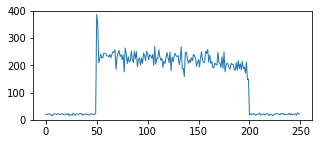

dev : 14


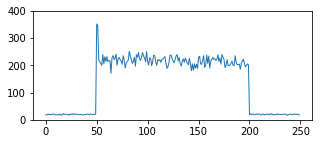

dev : 8


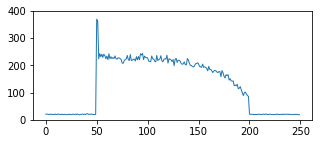

dev : 17


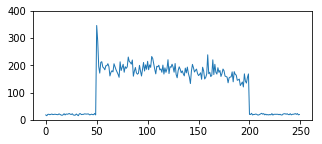

dev : 15


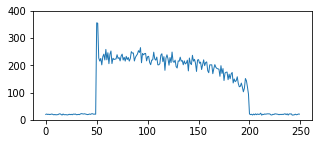

dev : 15


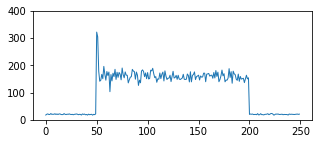

dev : 31


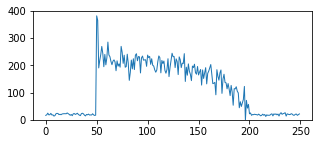

dev : 21


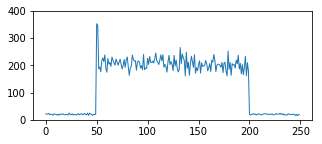

dev : 20


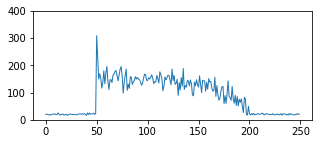

dev : 11


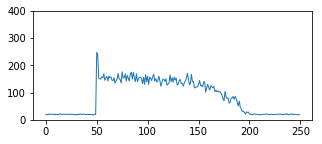

dev : 24


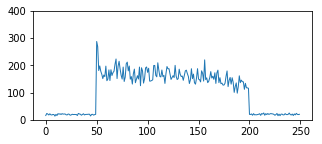

dev : 18


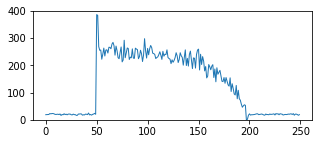

dev : 24


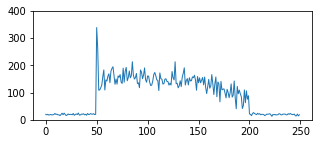

dev : 24


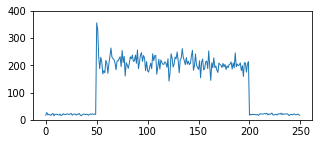

dev : 14


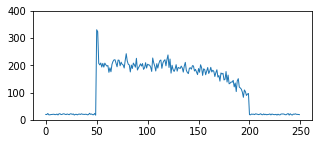

dev : 24


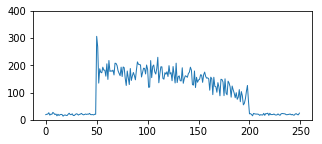

dev : 21


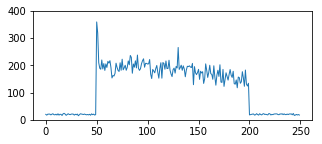

dev : 26


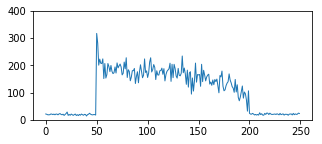

dev : 14


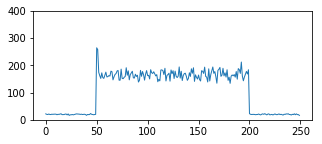

dev : 22


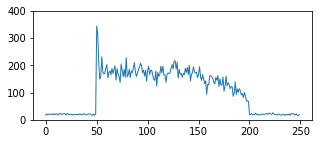

dev : 20


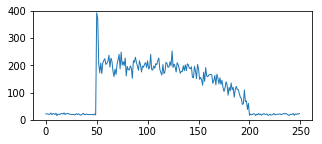

dev : 15


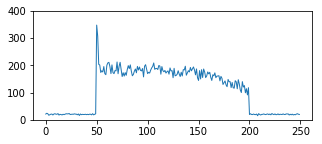

dev : 15


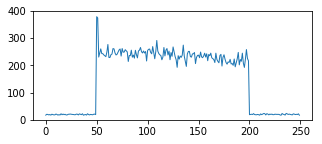

dev : 22


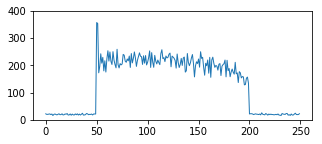

dev : 19


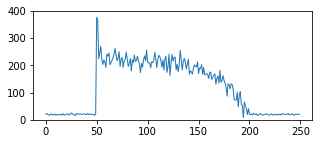

dev : 14


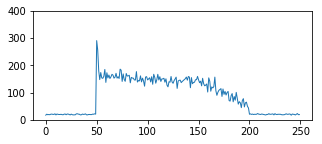

dev : 22


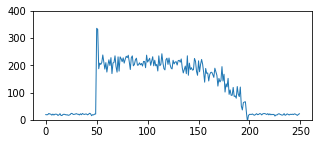

dev : 20


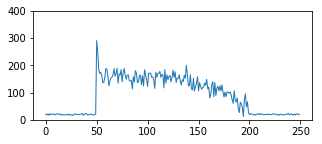

dev : 26


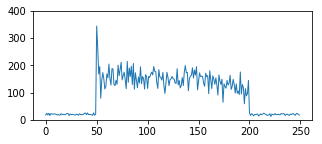

dev : 14


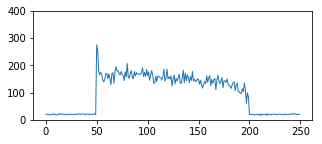

dev : 15


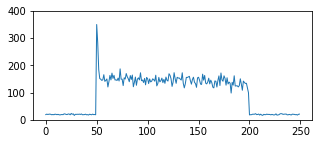

dev : 21


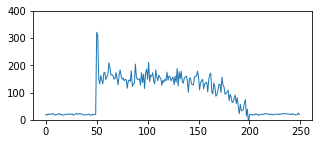

dev : 15


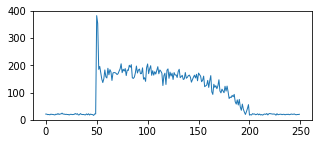

dev : 19


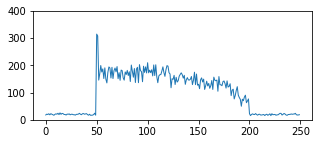

dev : 16


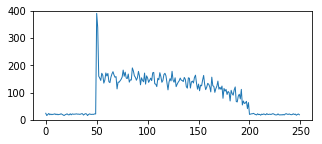

dev : 3


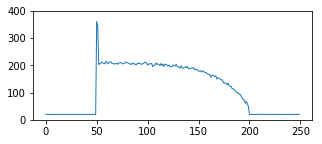

dev : 25


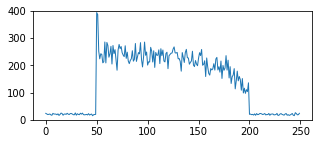

dev : 23


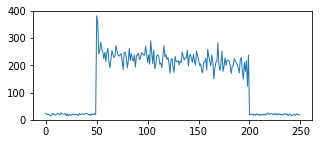

dev : 25


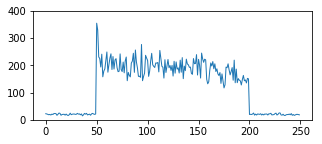

dev : 19


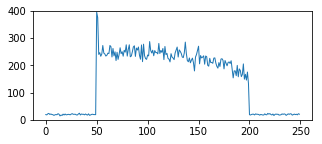

dev : 16


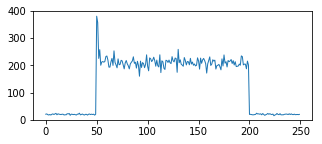

dev : 13


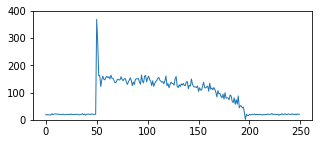

dev : 17


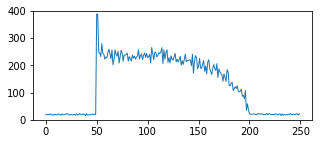

dev : 9


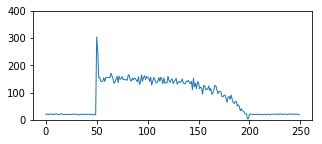

dev : 23


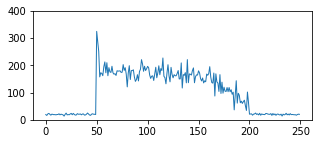

dev : 26


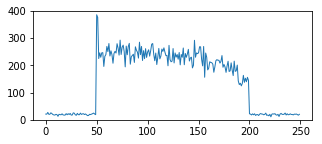

dev : 18


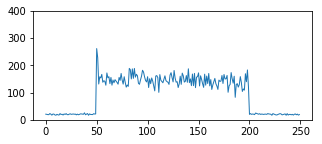

dev : 22


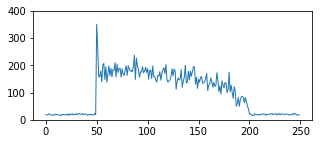

dev : 21


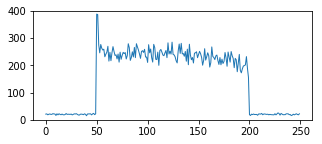

dev : 21


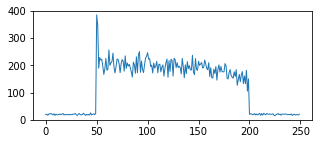

dev : 16


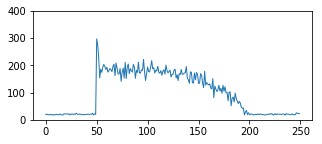

dev : 18


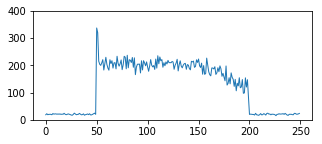

dev : 30


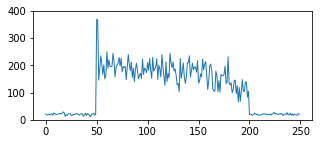

dev : 26


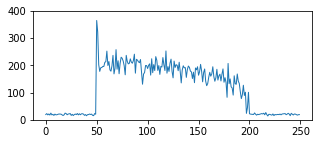

dev : 15


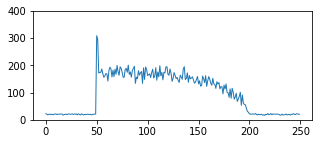

dev : 30


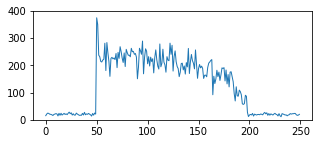

dev : 15


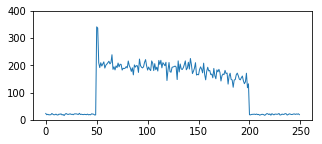

dev : 18


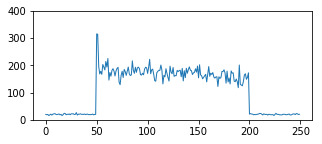

dev : 18


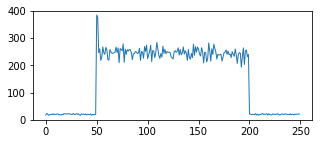

dev : 28


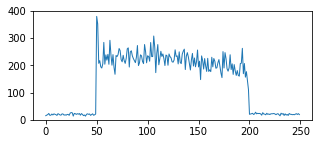

dev : 24


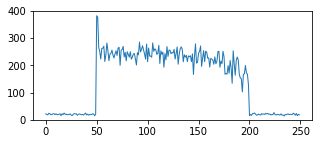

dev : 14


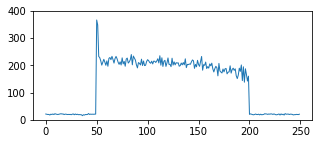

dev : 17


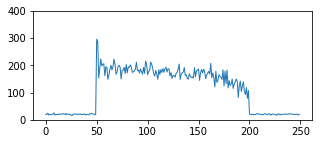

dev : 16


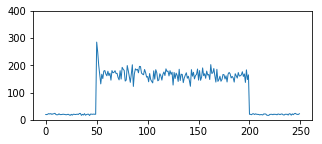

dev : 25


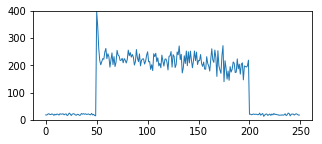

dev : 17


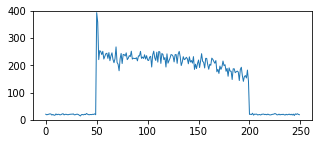

dev : 23


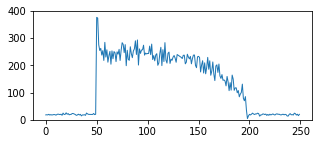

dev : 13


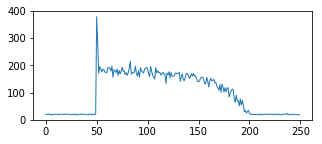

dev : 14


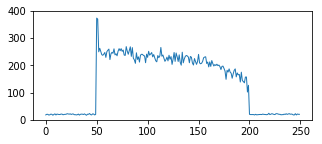

dev : 16


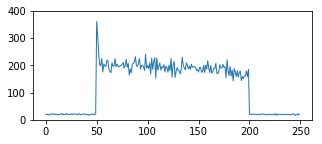

dev : 17


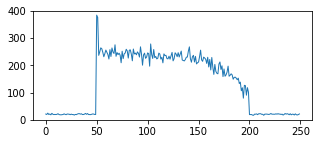

dev : 18


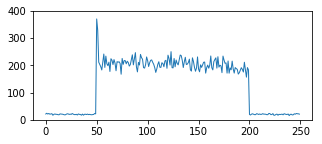

dev : 15


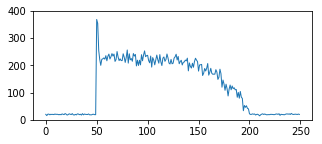

dev : 19


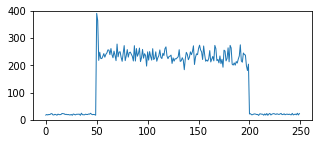

dev : 18


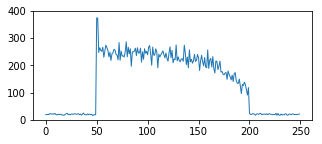

dev : 24


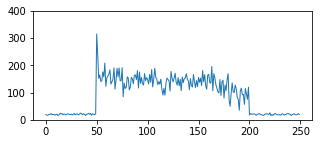

dev : 17


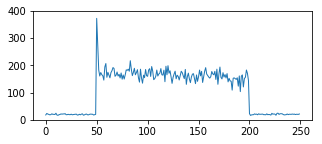

dev : 23


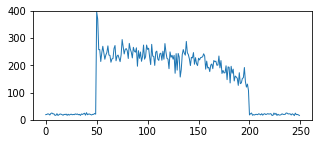

dev : 10


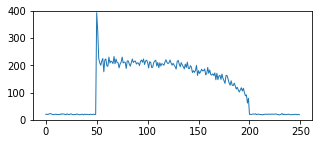

dev : 21


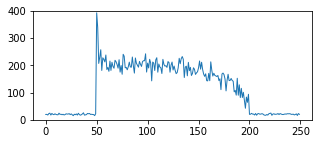

dev : 21


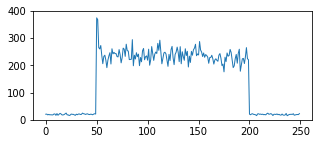

dev : 27


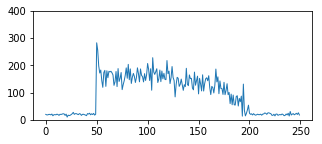

dev : 24


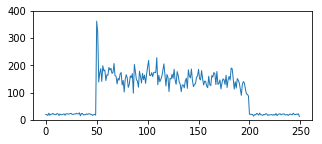

dev : 7


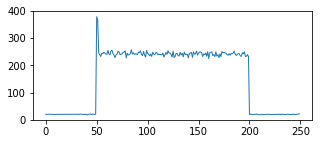

In [14]:
abnormal_dict_ref = dict()
abnormal_dict_fbk = dict()

for i in range(100):
    
    #Reference Data
    ref_before = [20] * 50
    ref_rolling = [randint(150,250)] * 150
    ref_after = [20] * 50
    ref_set = ref_before + ref_rolling + ref_after
    
    #Decreasing Phenomenon (by exponential function)
    fluc = random()
    h = np.unique(ref_rolling)[0]
    b = np.log(fluc*h)/len(ref_rolling)
    dcrs_rolling = [h - np.exp(b * i) + 1 for i in range(len(ref_rolling))]
    dcrs_rolling
    
    #Feedback Data
    dev = round(gauss(20,5))
    fbk_before = [gauss(np.unique(ref_before)[0], dev/10) for i in range(len(ref_before))]
    fbk_rolling = [gauss(i, dev) for i in dcrs_rolling]
    fbk_after = [gauss(np.unique(ref_after)[0], dev/10) for i in range(len(ref_after))]
    
    #Replacing Overshooting Data
    temp = []
    while len(temp) < len(fbk_rolling)/100:
        a = gauss(np.unique(ref_rolling)[0], 100)
        if (a >= np.unique(ref_rolling) * 1.5 and a <= 400):
            temp.append(a)
        else:
            pass
    temp.sort(reverse = True)
    fbk_rolling[0:round(len(fbk_rolling)/100)] = temp
    
    #Plotting
    fbk_set = fbk_before + fbk_rolling + fbk_after
    fig = plt.figure(figsize=(5,2))
    plt.plot(fbk_set, linewidth = 1)
    plt.ylim((0,400))
    #fig.savefig('./data/train/abnormal/abnormal' + str(i + 1) + '.jpg')
    fig.savefig('./data/test/' + str((i + 1)*2) + '.jpg')
    print('dev : ' + str(dev))
    plt.show()
    
    abnormal_dict_ref['abnormal_ref'+str(i)] = ref_set
    abnormal_dict_fbk['abnormal_fbk'+str(i)] = fbk_set
    
abnormal_dict_ref.update(abnormal_dict_fbk)
abnormal_dummy_data = pd.DataFrame(abnormal_dict_ref)
abnormal_dummy_data.to_csv('abnormal_dummy_data_100.csv', index = False)

In [24]:
pd.read_csv('abnormal_dummy_data.csv').iloc[:,1000:]

,abnormal_fbk0,abnormal_fbk1,abnormal_fbk2,abnormal_fbk3,abnormal_fbk4,abnormal_fbk5,abnormal_fbk6,abnormal_fbk7,abnormal_fbk8,abnormal_fbk9,...,abnormal_fbk990,abnormal_fbk991,abnormal_fbk992,abnormal_fbk993,abnormal_fbk994,abnormal_fbk995,abnormal_fbk996,abnormal_fbk997,abnormal_fbk998,abnormal_fbk999
0,18.843562,15.752129,18.764202,18.000125,22.834329,17.436219,19.145099,17.474994,20.829655,20.777428,...,20.844676,16.458154,17.946763,18.518721,17.796252,25.245531,16.833716,19.800416,19.616776,20.483049
1,19.815986,16.535293,21.307410,16.846038,19.571276,19.502863,19.397475,17.327054,16.832898,21.056030,...,21.644213,18.245148,19.094459,21.453384,20.763733,17.170682,19.888263,22.189570,21.293684,20.996054
2,20.197141,19.102650,19.433045,19.265764,20.618153,21.645880,21.001619,21.417958,22.962228,22.340182,...,21.022813,18.988268,19.657890,20.868239,24.763007,18.329023,20.329008,18.906693,20.643611,21.130082
3,20.865055,22.499104,16.444696,17.239620,21.350149,20.888087,19.780884,16.560057,21.326541,19.220547,...,18.864805,22.393113,17.844950,21.645689,23.220643,21.899113,18.228991,20.264127,19.179969,20.611210
4,19.159735,24.615034,20.144269,17.792950,21.430486,19.839369,19.144063,18.304092,22.233535,20.254016,...,22.977037,18.566558,20.768834,22.704176,20.988166,22.573995,18.737489,22.140311,20.831032,19.906094
5,19.564112,21.224571,20.377987,19.848903,16.815706,21.449762,19.589558,20.201095,21.466834,20.401935,...,21.852292,15.729909,20.244856,17.521519,18.010416,18.052735,20.575709,20.603000,19.549331,20.584129
6,21.410961,16.342365,16.364340,24.927880,20.800549,21.698215,20.940125,22.785758,18.774498,15.347228,...,17.693727,15.721040,17.367235,20.265829,17.601413,20.473437,18.339645,20.253199,18.559457,18.676806
7,18.883742,19.011108,17.837893,22.089398,22.600205,19.113566,18.764055,17.498631,16.911628,23.073354,...,20.900248,20.013435,19.192368,19.993127,21.237988,18.835515,21.236057,20.659290,21.136858,19.107352
8,19.617283,19.189413,21.362214,19.510045,20.929314,19.164401,20.626226,20.023358,22.928436,22.625507,...,18.840881,18.798930,23.334655,17.113277,20.112622,21.120238,17.690451,20.890881,20.666409,19.612643
9,18.164987,15.476403,19.210143,21.745330,22.568166,21.358716,17.238447,15.747887,20.959498,19.845661,...,22.051181,18.744332,21.398451,20.709998,18.694885,18.954980,18.098666,20.209928,20.063843,20.332425


### Micro Data Plotting for Presentation

dev : 26


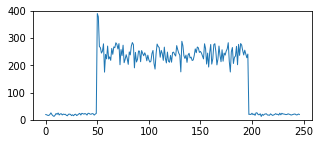

dev : 26


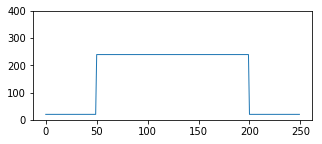

In [99]:
ref_before = [20] * 50
ref_rolling = [randint(150,250)] * 150
ref_after = [20] * 50
ref_set = ref_before + ref_rolling + ref_after
    
fluc = random()
h = np.unique(ref_rolling)[0]
b = np.log(fluc*h)/len(ref_rolling)
dcrs_rolling = [h - np.exp(b * i) + 1 for i in range(len(ref_rolling))]
dcrs_rolling
    
dev = round(gauss(20,5))
fbk_before = [gauss(np.unique(ref_before)[0], dev/10) for i in range(len(ref_before))]
fbk_rolling = [gauss(i, dev) for i in dcrs_rolling]
fbk_after = [gauss(np.unique(ref_after)[0], dev/10) for i in range(len(ref_after))]
    
temp = []
while len(temp) < len(fbk_rolling)/100:
    a = gauss(np.unique(ref_rolling)[0], 100)
    if (a >= np.unique(ref_rolling) * 1.5 and a <= 400):
        temp.append(a)
    else:
        pass
    temp.sort(reverse = True)
    fbk_rolling[0:round(len(fbk_rolling)/100)] = temp
    
fbk_set = fbk_before + fbk_rolling + fbk_after

fig = plt.figure(figsize=(5,2))
plt.plot(fbk_set, linewidth = 1)
plt.ylim((0,400))
print('dev : ' + str(dev))
plt.show()
graph_showing_fbk = dict()
graph_showing_fbk['fbk'] = fbk_set

fig = plt.figure(figsize=(5,2))
plt.plot(ref_set, linewidth = 1)
plt.ylim((0,400))
print('dev : ' + str(dev))
plt.show()
graph_showing_ref = dict()
graph_showing_ref['ref'] = ref_set

mean : 238.873
deviation : 43.147
quartile 1st : 222.922
median : 242.267
quartile 3st : 261.006
kurtosis : 12.327
skewness : -2.095


C:\Users\USER\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


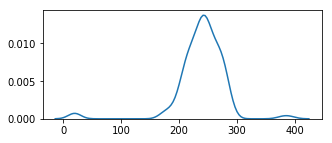

In [100]:
x = graph_showing_fbk['fbk'][50:200]
fig = plt.figure(figsize=(5,2))
#plt.ylim((0,1))
sns.kdeplot(x)
print('mean : ' + str(round(np.mean(x), 3)))
print('deviation : ' + str(round(np.std(x), 3)))
print('quartile 1st : ' + str(round(np.percentile(x, 25), 3)))
print('median : ' + str(round(np.percentile(x, 50),3)))
print('quartile 3st : ' + str(round(np.percentile(x, 75),3)))
print('kurtosis : ' + str(round(kurtosis(x),3)))
print('skewness : ' + str(round(skew(x),3)))

C:\Users\USER\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


mean : 19.793
deviation : 2.968
quartile 1st : 17.607
median : 20.3
quartile 3st : 21.931
kurtosis : -0.612
skewness : -0.238


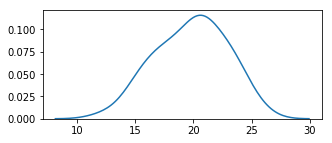

In [101]:
x = graph_showing_fbk['fbk'][0:50]
fig = plt.figure(figsize=(5,2))
#plt.ylim((0,1))
sns.kdeplot(x)
print('mean : ' + str(round(np.mean(x), 3)))
print('deviation : ' + str(round(np.std(x), 3)))
print('quartile 1st : ' + str(round(np.percentile(x, 25), 3)))
print('median : ' + str(round(np.percentile(x, 50),3)))
print('quartile 3st : ' + str(round(np.percentile(x, 75),3)))
print('kurtosis : ' + str(round(kurtosis(x),3)))
print('skewness : ' + str(round(skew(x),3)))

mean : 19.931
deviation : 2.555
quartile 1st : 18.422
median : 19.816
quartile 3st : 21.476
kurtosis : 0.643
skewness : -0.09


C:\Users\USER\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


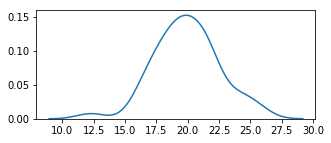

In [102]:
x = graph_showing_fbk['fbk'][200:]
fig = plt.figure(figsize=(5,2))
#plt.ylim((0,1))
sns.kdeplot(x)
print('mean : ' + str(round(np.mean(x), 3)))
print('deviation : ' + str(round(np.std(x), 3)))
print('quartile 1st : ' + str(round(np.percentile(x, 25), 3)))
print('median : ' + str(round(np.percentile(x, 50),3)))
print('quartile 3st : ' + str(round(np.percentile(x, 75),3)))
print('kurtosis : ' + str(round(kurtosis(x),3)))
print('skewness : ' + str(round(skew(x),3)))

In [103]:
graph_showing_ref['ref']

[20,
 20,
 20,
 20,
 20,
 20,
 20,
 20,
 20,
 20,
 20,
 20,
 20,
 20,
 20,
 20,
 20,
 20,
 20,
 20,
 20,
 20,
 20,
 20,
 20,
 20,
 20,
 20,
 20,
 20,
 20,
 20,
 20,
 20,
 20,
 20,
 20,
 20,
 20,
 20,
 20,
 20,
 20,
 20,
 20,
 20,
 20,
 20,
 20,
 20,
 240,
 240,
 240,
 240,
 240,
 240,
 240,
 240,
 240,
 240,
 240,
 240,
 240,
 240,
 240,
 240,
 240,
 240,
 240,
 240,
 240,
 240,
 240,
 240,
 240,
 240,
 240,
 240,
 240,
 240,
 240,
 240,
 240,
 240,
 240,
 240,
 240,
 240,
 240,
 240,
 240,
 240,
 240,
 240,
 240,
 240,
 240,
 240,
 240,
 240,
 240,
 240,
 240,
 240,
 240,
 240,
 240,
 240,
 240,
 240,
 240,
 240,
 240,
 240,
 240,
 240,
 240,
 240,
 240,
 240,
 240,
 240,
 240,
 240,
 240,
 240,
 240,
 240,
 240,
 240,
 240,
 240,
 240,
 240,
 240,
 240,
 240,
 240,
 240,
 240,
 240,
 240,
 240,
 240,
 240,
 240,
 240,
 240,
 240,
 240,
 240,
 240,
 240,
 240,
 240,
 240,
 240,
 240,
 240,
 240,
 240,
 240,
 240,
 240,
 240,
 240,
 240,
 240,
 240,
 240,
 240,
 240,
 240,
 240,
 240,
